In [16]:
import sys
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource, LogNorm
import numpy as np
import os
import h5py
import arepo_package as arepo_package
from astropy import constants as c
from astropy import units as u
from LtU_get_property import get_particle_property_LTU
import illustris_python.groupcat as gc
%matplotlib inline

/tmp/ipykernel_605598/698196257.py:7: RuntimeWarning: divide by zero encountered in divide
  mask = GroupMassType[:,1]/GroupMassType[:,4]>1


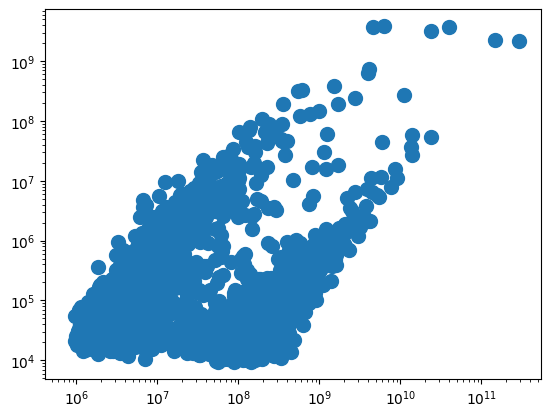

In [103]:
desired_redshift=6
basePath = '/project/torrey-group/jkho/LtU_accretion/Zooms/FF_zoom/FF_zoom_output//'
GroupMass,o=arepo_package.get_group_property(basePath,'GroupMass',desired_redshift)
GroupMassType,o=arepo_package.get_group_property(basePath,'GroupMassType',desired_redshift)
LowResFraction = GroupMassType[:,2]/(GroupMassType[:,1]+GroupMassType[:,2])
GroupStarMass = GroupMassType[:,4]
mask = GroupMassType[:,1]/GroupMassType[:,4]>1
fig,ax = plt.subplots(1,1)
ax.errorbar(GroupMass[LowResFraction==0]*1e10,GroupStarMass[LowResFraction==0]*1e10,marker='o',linewidth=0,ms=10)
ax.set_xscale('log')
ax.set_yscale('log')

In [80]:
basePath = '/project/torrey-group/jkho/LtU_accretion'
Simtype = 'Zooms' # 'Constrained'
sim1 = 'FF_zoom' # 'Bondi_constrained' 
output = 'FF_zoom_output' # 'SFMFGM5_FOF10_LW10_seed5.00_Bondi_DFD_3' 
path = f'{basePath}/{Simtype}/{sim1}/{output}/'

Img_path = 'Plots/'
snap = 19

# snap = arepo_package.get_snapshot_redshift_correspondence(path,snap)
Subhalos_zoom = gc.loadSubhalos(path,snap,fields = ['SubhaloMassType']) # Snap 20 is the latest
redshift = arepo_package.get_redshift_from_snapshot(path,snap)

In [81]:
basePath = '/project/torrey-group/jkho/LtU_accretion'
Simtype = 'Constrained'
sim2 = 'Bondi_constrained' 
output = 'SFMFGM5_FOF10_LW10_seed5.00_Bondi_DFD_3' 
path = f'{basePath}/{Simtype}/{sim2}/{output}/'

Img_path = 'Plots/'
snap = 19

# snap = arepo_package.get_snapshot_redshift_correspondence(path,snap)
Subhalos_constrained = gc.loadSubhalos(path,snap,fields = ['SubhaloMassType']) # Snap 20 is the latest
redshift = arepo_package.get_redshift_from_snapshot(path,snap)

In [73]:
h = 0.6771

DM_zoom_Masses = Subhalos_zoom[:,0] * 1e10/h
Star_zoom_Masses = Subhalos_zoom[:,4] * 1e10/h

nonzero = (DM_zoom_Masses != 0) & (Star_zoom_Masses != 0)

Nonzero_DM_zoom = np.log10(DM_zoom_Masses[nonzero])
Nonzero_star_zoom = np.log10(Star_zoom_Masses[nonzero])

h = 0.6771

DM_con_Masses = Subhalos_constrained[:,0] * 1e10/h
Star_con_Masses = Subhalos_constrained[:,4] * 1e10/h

nonzero = (DM_con_Masses != 0) & (Star_con_Masses != 0)

Nonzero_DM_con = np.log10(DM_con_Masses[nonzero])
Nonzero_star_con = np.log10(Star_con_Masses[nonzero])

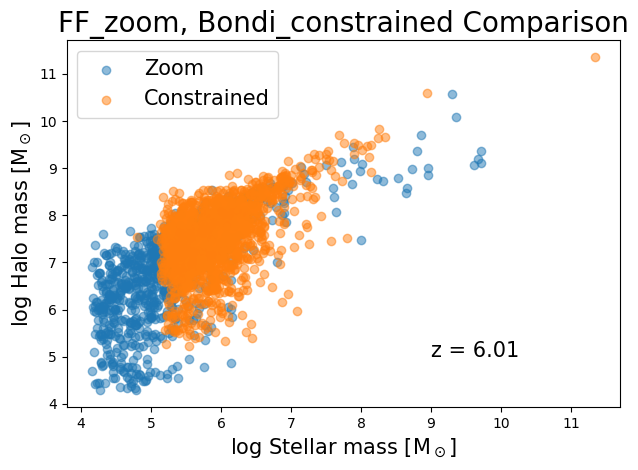

In [82]:
plt.scatter(Nonzero_star_zoom,Nonzero_DM_zoom,label = 'Zoom',alpha=0.5)
plt.scatter(Nonzero_star_con,Nonzero_DM_con,label = 'Constrained',alpha=0.5)
plt.xlabel(r'log Stellar mass [$\rm M_\odot$]',size=15)
plt.ylabel(r'log Halo mass [$\rm M_\odot]$',size=15)
plt.title(f'{sim1}, {sim2} Comparison',size=20)
plt.text(9,5,f'z = {redshift:.3}',size=15)
plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig(f'{Img_path}/{sim}_DM_Mstar.png')
plt.savefig(f'{Img_path}/Comparison_DM_Mstar.png')

# Calculating DM2 masses

In [84]:
basePath = '/project/torrey-group/jkho/LtU_accretion'
Simtype = 'Zooms' # 'Constrained'
sim1 = 'FF_zoom' # 'Bondi_constrained' 
output = 'FF_zoom_output' # 'SFMFGM5_FOF10_LW10_seed5.00_Bondi_DFD_3' 
path = f'{basePath}/{Simtype}/{sim1}/{output}/'

Img_path = 'Plots/'
snap = 19

# snap = arepo_package.get_snapshot_redshift_correspondence(path,snap)
Group_zoom = gc.loadHalos(path,snap,fields = ['GroupMassType']) # Snap 20 is the latest
redshift = arepo_package.get_redshift_from_snapshot(path,snap)

Lowres_DM = Group_zoom[:,2] * 1e10/h

In [88]:
len(Lowres_DM[Lowres_DM != 0])

0

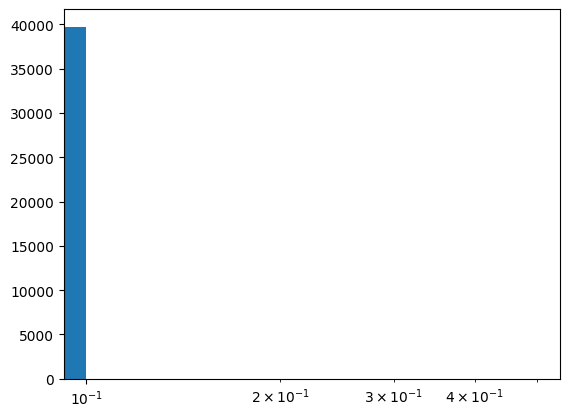

In [86]:
plt.hist(Lowres_DM)
plt.xscale('log')
plt.show()

# Box image

In [93]:
basePath = '/project/torrey-group/jkho/LtU_accretion'
Simtype = 'Zooms' # 'Constrained'
sim1 = 'FF_zoom' # 'Bondi_constrained' 
output = 'FF_zoom_output' # 'SFMFGM5_FOF10_LW10_seed5.00_Bondi_DFD_3' 
path = f'{basePath}/{Simtype}/{sim1}/{output}/'

Img_path = 'Plots/'
snap = 19
redshift = arepo_package.get_redshift_from_snapshot(path,snap)

# snap = arepo_package.get_snapshot_redshift_correspondence(path,snap)
Gas_Pos = get_particle_property_LTU(path,'Coordinates',p_type=0, desired_redshift = redshift)[0]
BH_Pos = get_particle_property_LTU(path,'Coordinates',p_type=5, desired_redshift = redshift)[0]
Star_Pos = get_particle_property_LTU(path,'Coordinates',p_type=4, desired_redshift = redshift)[0]

'NoneType' object has no attribute 'get'
'NoneType' object has no attribute 'get'
'NoneType' object has no attribute 'get'


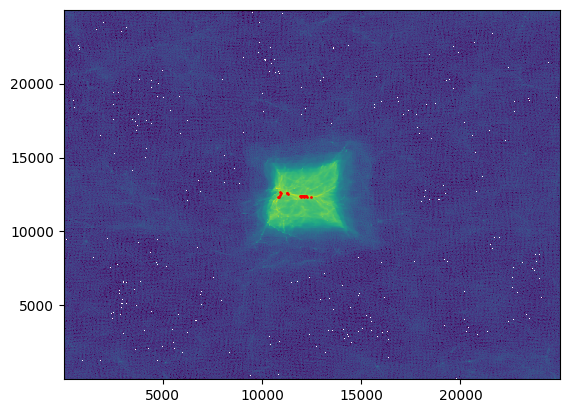

In [99]:
plt.hist2d(Gas_Pos[:,0],Gas_Pos[:,1],norm='log',bins = (500,500))
plt.scatter(BH_Pos[:,0],BH_Pos[:,1],color='red',s=1)
plt.savefig(f'{Img_path}/Gas_dist.png')